In [127]:
import pandas as pd 
import numpy as np 
#시각화
import matplotlib.pyplot as plt
import seaborn as sns
#경고무시
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic' # 맥(Mac) 사용자

In [82]:
df = pd.read_csv('./팀_basline_csv.csv', encoding='utf-8')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,금요일,주중,1,406
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N,금요일,주중,1,13
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N,금요일,주중,1,13
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N,금요일,주중,1,13
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,금요일,주중,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...
1461,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y,공휴일,휴일,3,691
1462,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y,공휴일,휴일,3,18
1463,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y,공휴일,휴일,3,1
1464,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y,공휴일,휴일,3,1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   brandnm     1466 non-null   object
 1   goodsnm     1466 non-null   object
 2   USER        1466 non-null   object
 3   reg_date    1466 non-null   object
 4   order_date  1466 non-null   object
 5   p_type      1466 non-null   object
 6   sub_type    1466 non-null   object
 7   app_yn      1466 non-null   object
 8   days        1466 non-null   object
 9   day_type    1466 non-null   object
 10  month       1466 non-null   int64 
 11  How_long    1466 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 137.6+ KB


##  2-1. 유저당 주문 수량 분석
최근 3개월 전체 분석 / 각 월 별 분석

In [84]:
usr = list(df.USER.unique())
# usr  # 고객명단

In [85]:
df.groupby('USER').count()

# 전체 행이 1471인데, 고객별로 묶으면, 1234행

,brandnm,goodsnm,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
USER,,,,,,,,,,,
a1100548,2,2,2,2,2,2,2,2,2,2,2
a1100887,1,1,1,1,1,1,1,1,1,1,1
a1101514,1,1,1,1,1,1,1,1,1,1,1
a1101645,1,1,1,1,1,1,1,1,1,1,1
a1102068,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
a198621,1,1,1,1,1,1,1,1,1,1,1
a19897,1,1,1,1,1,1,1,1,1,1,1
a199351,1,1,1,1,1,1,1,1,1,1,1


In [86]:
df.groupby('USER').count().sort_values(by='p_type', ascending=False)

,brandnm,goodsnm,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
USER,,,,,,,,,,,
a1149461,11,11,11,11,11,11,11,11,11,11,11
a1149583,10,10,10,10,10,10,10,10,10,10,10
a1142677,9,9,9,9,9,9,9,9,9,9,9
a1143701,7,7,7,7,7,7,7,7,7,7,7
a189404,7,7,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...
a1145296,1,1,1,1,1,1,1,1,1,1,1
a1145327,1,1,1,1,1,1,1,1,1,1,1
a1145335,1,1,1,1,1,1,1,1,1,1,1


### 2-1. Q1>  최근 3개월 전체 분석

In [87]:
a = df.USER.value_counts()
for i in range(1, 12):
    if len(a[a.values > i]) != 0:
        print('전체 이용 고객 중 {}개 이상 빌린 고객 수 : '.format(i+1), len(a[a.values > i]))
    else:
        break

전체 이용 고객 중 2개 이상 빌린 고객 수 :  139
전체 이용 고객 중 3개 이상 빌린 고객 수 :  50
전체 이용 고객 중 4개 이상 빌린 고객 수 :  17
전체 이용 고객 중 5개 이상 빌린 고객 수 :  9
전체 이용 고객 중 6개 이상 빌린 고객 수 :  8
전체 이용 고객 중 7개 이상 빌린 고객 수 :  5
전체 이용 고객 중 8개 이상 빌린 고객 수 :  3
전체 이용 고객 중 9개 이상 빌린 고객 수 :  3
전체 이용 고객 중 10개 이상 빌린 고객 수 :  2
전체 이용 고객 중 11개 이상 빌린 고객 수 :  1


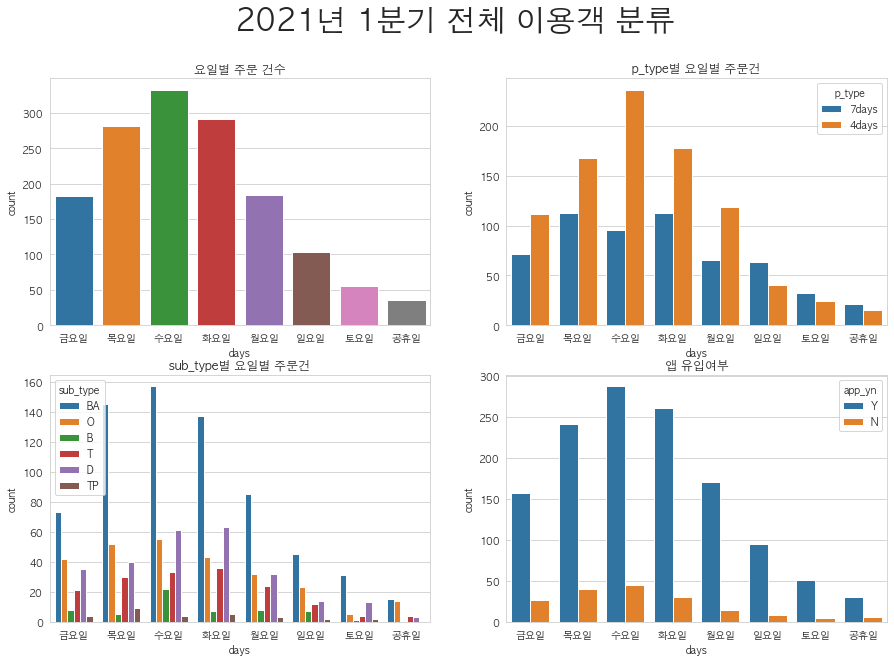

In [88]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
sns.countplot(data=df, x='days')
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=df, x='days', hue='p_type')
plt.title('p_type별 요일별 주문건')

plt.subplot(223)
sns.countplot(data=df, x='days', hue='sub_type')
plt.title('sub_type별 요일별 주문건')

plt.subplot(224)
sns.countplot(data=df, x='days', hue='app_yn')
plt.title('앱 유입여부')

plt.suptitle('2021년 1분기 전체 이용객 분류',fontsize=30, fontweight = 'bold')
plt.show()

In [89]:
# 10회 이상 구매한 고객 1 
df.query('USER=="a1149461"')
# 하루에 여러가지 옷을 렌트
# 촬영이나 상업적 이용이 있을지도 

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
1144,Alice & Olivia,see-through lace detail blouse black,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1145,Sandro,embroidery detail lace skirt multi,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1146,Time,draping detail midi skirt gray,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1147,El estilo de Claire,ruffle detail see-through sleeve blouse black,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1148,It michaa,pocket basic pattern skirt green,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1149,roajeu,ruffle basic pattern mermaid trumpet-skirt green,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1150,Alexander Wang,basic pattern skirt grey,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1151,Christian Dior,basic pattern sweater burgundy,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1152,MSGM,basic pattern top black,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1153,Fayewoo,ruffle lace pattern mermaid trumpet-skirt red,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2


In [90]:
# 10회 이상 구매한 고객 2 
df.query('USER=="a1149583"')
# 마찬가지로 하루에 여러 상품 렌트
# 앱 사용 x

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
1098,Theory,one button jacket gray,a1149583,2021-03-16,2021-03-19,4days,O,N,금요일,주중,3,3
1099,Michaa,stitch detail midi skirt white,a1149583,2021-03-16,2021-03-19,4days,B,N,금요일,주중,3,3
1100,Prada,daino shoulder bag skin,a1149583,2021-03-16,2021-03-19,4days,BA,N,금요일,주중,3,3
1101,Ted Baker,pleats basic pattern blouse pink,a1149583,2021-03-16,2021-03-19,4days,T,N,금요일,주중,3,3
1102,La maille sezane,frill dots pattern blouse nude,a1149583,2021-03-16,2021-03-19,4days,T,N,금요일,주중,3,3
1103,Michaa,basic pattern A-Line knit-dress nude,a1149583,2021-03-16,2021-03-19,4days,D,N,금요일,주중,3,3
1104,Jigott,button basic pattern blouse white,a1149583,2021-03-16,2021-03-19,4days,T,N,금요일,주중,3,3
1105,It michaa,basic pattern H-Line dress white,a1149583,2021-03-16,2021-03-19,4days,D,N,금요일,주중,3,3
1106,Mine,basic pattern skirt pink,a1149583,2021-03-16,2021-03-19,4days,B,N,금요일,주중,3,3
1107,Mine,punching basic pattern skirt skyblue,a1149583,2021-03-16,2021-03-19,4days,B,N,금요일,주중,3,3


In [91]:
a = df.USER.value_counts()
# 3개 이상 이용한 고객의 선호 브랜드

more3 = list(a[a.values > 2].index)
more3

more3_df = df[df.USER==more3[0]]

for i in range(1,len(more3)):
    more3_df = pd.concat([more3_df, df[df.USER==more3[i]]])
more3_df


more3_df.brandnm.value_counts(ascending=False).head(10)
# more3_df.brandnm.value_counts(ascending=False).head(30)

Mixed                  8
El estilo de Claire    6
Burberry               6
Max Mara               6
Christian Dior         5
Burberry London        5
Saint Laurent          5
Thom Browne            4
Michaa                 4
Sandro                 4
Name: brandnm, dtype: int64

In [92]:
df[df.brandnm == 'Mixed']

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
146,Mixed,feminine military blouse & high waist wide slacks,a1144948,2021-01-30,2021-01-30,4days,TP,Y,토요일,휴일,1,0
147,Mixed,button basic pattern doublebreasted-jacket sky...,a170041,2020-01-01,2021-01-30,4days,TP,Y,토요일,휴일,1,395
160,Mixed,lace point shirring blouse pink & lace detail ...,a1141009,2021-01-04,2021-01-28,4days,TP,Y,목요일,주중,1,24
220,Mixed,printing pattern hoodie grey & pocket basic pa...,a1144470,2021-01-25,2021-01-26,4days,TP,Y,화요일,주중,1,1
266,Mixed,button basic pattern jacket black & pocket bas...,a121913,2019-05-05,2021-01-21,4days,TP,Y,목요일,주중,1,627
281,Mixed,buckle shirt & embroidery lace skirt charcoal,a1132297,2020-11-22,2021-01-21,7days,TP,Y,목요일,주중,1,60
284,Mixed,button tweed pattern doublebreasted-coat multi...,a1127979,2020-10-31,2021-01-21,7days,TP,Y,목요일,주중,1,82
328,Mixed,long sleeve rib t-shirt & check pattern square...,a1134915,2020-12-03,2021-01-19,7days,TP,N,화요일,주중,1,47
341,Mixed,cutout neck knit & color pleats belt skirt,a1141257,2021-01-05,2021-01-19,4days,TP,Y,화요일,주중,1,14
366,Mixed,El estilo de Claire - neoprene botanical print...,a1107090,2020-07-03,2021-01-17,4days,TP,Y,일요일,휴일,1,198


### 2-1. Q2>  각 월별 유저 분석

In [93]:
df.month.value_counts()

3    638
2    453
1    375
Name: month, dtype: int64

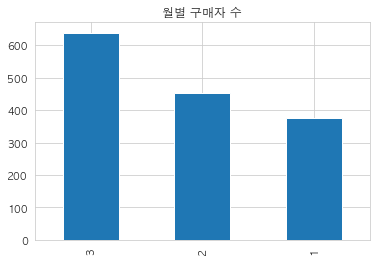

In [94]:
df.month.value_counts().plot(kind='bar')
plt.title('월별 구매자 수')
plt.show()

### -1월

In [95]:
# 2021. 1월에 구매한 사람

use_Jan = df[df.month == 1]
use_Jan

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,금요일,주중,1,406
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N,금요일,주중,1,13
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N,금요일,주중,1,13
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N,금요일,주중,1,13
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,금요일,주중,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Prada,check pattern lined vest,a160435,2019-12-03,2021-01-17,4days,T,Y,일요일,휴일,1,411
371,Mixed,frill detail knit & dot pattern skirt,a171081,2020-01-06,2021-01-17,7days,TP,Y,일요일,휴일,1,377
372,Thom Browne,button stripe pattern cashmere sweater grey,a1136372,2020-12-10,2021-01-16,4days,T,Y,토요일,휴일,1,37
373,Louis Vuitton,strap basic pattern coat black,a1137705,2020-12-18,2021-01-16,7days,O,Y,토요일,휴일,1,29


In [96]:
use_Jan = df[df.month == 1]
a = use_Jan.USER.value_counts()

for i in range(1, 12):
    if len(a[a.values > i]) != 0:
        print('{}월 이용 고객 중 {}개 이상 빌린 고객 수 : '.format(1, i+1), len(a[a.values > i]))
    else:
        break

1월 이용 고객 중 2개 이상 빌린 고객 수 :  35
1월 이용 고객 중 3개 이상 빌린 고객 수 :  16
1월 이용 고객 중 4개 이상 빌린 고객 수 :  6
1월 이용 고객 중 5개 이상 빌린 고객 수 :  3
1월 이용 고객 중 6개 이상 빌린 고객 수 :  2
1월 이용 고객 중 7개 이상 빌린 고객 수 :  2
1월 이용 고객 중 8개 이상 빌린 고객 수 :  1
1월 이용 고객 중 9개 이상 빌린 고객 수 :  1


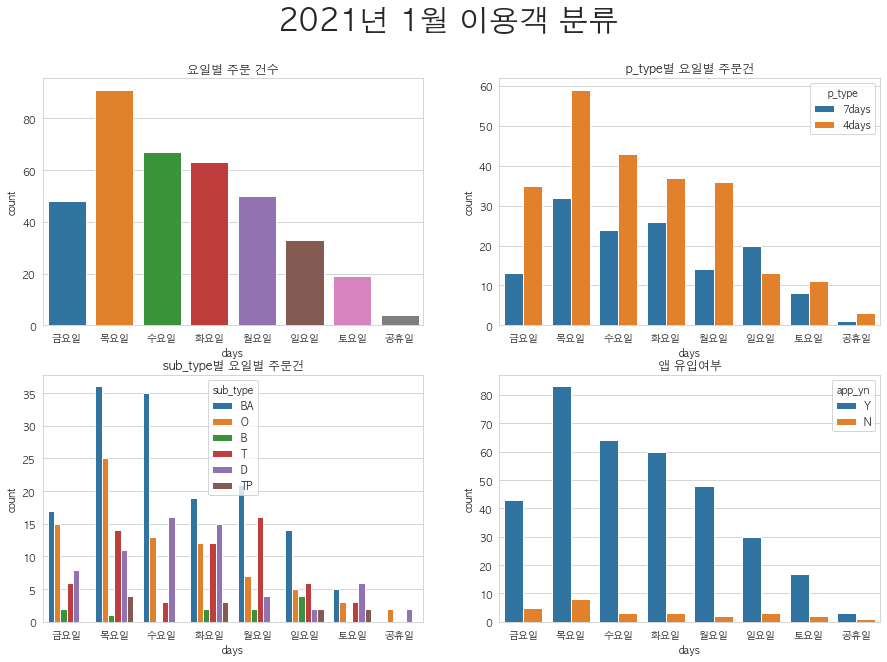

In [97]:
# 요일별 구매 분포

f, ax  = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
sns.countplot(data=use_Jan, x='days')
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=use_Jan, x='days', hue='p_type')
plt.title('p_type별 요일별 주문건')

plt.subplot(223)
sns.countplot(data=use_Jan, x='days', hue='sub_type')
plt.title('sub_type별 요일별 주문건')

plt.subplot(224)
sns.countplot(data=use_Jan, x='days', hue='app_yn')
plt.title('앱 유입여부')

plt.suptitle('2021년 1월 이용객 분류',fontsize=30, fontweight = 'bold')
plt.show()

### -2월

In [98]:
use_Feb = df[df.month == 2]
use_Feb

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
375,Prada,high neck robe jumper gray,a1112637,2020-08-16,2021-02-28,7days,O,Y,일요일,휴일,2,196
376,Louis Vuitton,unbalance detail zip-up jumper,a1112637,2020-08-16,2021-02-28,7days,O,Y,일요일,휴일,2,196
377,El estilo de Claire,see-through lace dress black,a1147589,2021-02-25,2021-02-28,7days,D,Y,일요일,휴일,2,3
378,Banana Republic,pocket basic pattern cardigan khaki,a1147589,2021-02-25,2021-02-28,7days,O,Y,일요일,휴일,2,3
379,Audrey Tailor,pocket basic pattern slacks navy,a1147589,2021-02-25,2021-02-28,7days,B,Y,일요일,휴일,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
823,Gucci,pattern pointed a-line skirts,a1135235,2020-12-04,2021-02-01,4days,B,Y,월요일,주중,2,59
824,Chloe,faye small bag black,a1144998,2021-01-31,2021-02-01,4days,BA,N,월요일,주중,2,1
825,Prada,button basic pattern coat black,a1144978,2021-01-31,2021-02-01,7days,O,Y,월요일,주중,2,1
826,Saint Laurent,mini sunset chain bag black,a1145011,2021-01-31,2021-02-01,7days,BA,Y,월요일,주중,2,1


In [99]:
use_Feb = df[df.month == 2]
a = use_Feb.USER.value_counts()

for i in range(1, 12):
    if len(a[a.values > i]) != 0:
        print('{}월 이용 고객 중 {}개 이상 빌린 고객 수 : '.format(2, i+1), len(a[a.values > i]))
    else:
        break

2월 이용 고객 중 2개 이상 빌린 고객 수 :  47
2월 이용 고객 중 3개 이상 빌린 고객 수 :  17
2월 이용 고객 중 4개 이상 빌린 고객 수 :  4
2월 이용 고객 중 5개 이상 빌린 고객 수 :  1
2월 이용 고객 중 6개 이상 빌린 고객 수 :  1


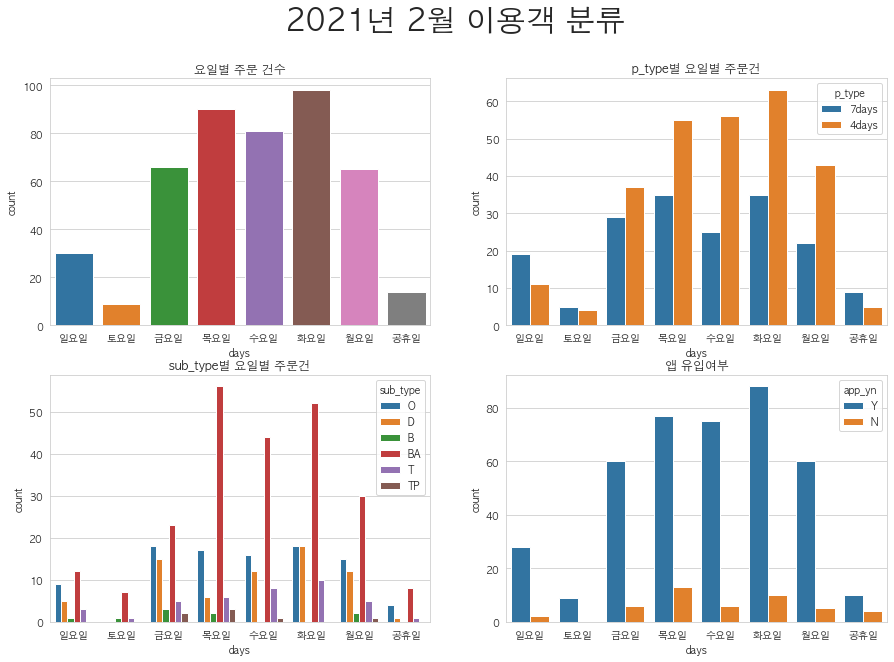

In [100]:
# 요일별 구매 분포
# 2월 공휴일(7)은 설연휴임
# 설연휴 : 2월 11일 ~ 2월 13일(목요일 ~ 토요일)

f, ax  = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
sns.countplot(data=use_Feb, x='days')
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=use_Feb, x='days', hue='p_type')
plt.title('p_type별 요일별 주문건')

plt.subplot(223)
sns.countplot(data=use_Feb, x='days', hue='sub_type')
plt.title('sub_type별 요일별 주문건')

plt.subplot(224)
sns.countplot(data=use_Feb, x='days', hue='app_yn')
plt.title('앱 유입여부')

plt.suptitle('2021년 2월 이용객 분류',fontsize=30, fontweight = 'bold')
plt.show()

### -3월

In [101]:
use_Mar = df[df.month == 3]
use_Mar

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
828,Burberry,button check pattern H-Line dress multi,a1151196,2021-03-28,2021-03-31,7days,D,N,수요일,주중,3,3
829,El estilo de Claire,frill stripe knit cardigan muti,a1151564,2021-03-31,2021-03-31,7days,T,N,수요일,주중,3,0
830,Chanel,tweed jacket brown,a1148120,2021-03-03,2021-03-31,4days,O,N,수요일,주중,3,28
831,Chloe,round handle tote bag black,a117466,2019-03-06,2021-03-31,4days,BA,Y,수요일,주중,3,756
832,Gucci,vintage web shoulder bag black,a110727,2018-10-27,2021-03-31,4days,BA,N,수요일,주중,3,886
...,...,...,...,...,...,...,...,...,...,...,...,...
1461,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y,공휴일,휴일,3,691
1462,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y,공휴일,휴일,3,18
1463,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y,공휴일,휴일,3,1
1464,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y,공휴일,휴일,3,1


In [102]:
use_Mar = df[df.month == 3]
a = use_Mar.USER.value_counts()

for i in range(1, 12):
    if len(a[a.values > i]) != 0:
        print('{}월 이용 고객 중 {}개 이상 빌린 고객 수 : '.format(3, i+1), len(a[a.values > i]))
    else:
        break

3월 이용 고객 중 2개 이상 빌린 고객 수 :  57
3월 이용 고객 중 3개 이상 빌린 고객 수 :  17
3월 이용 고객 중 4개 이상 빌린 고객 수 :  7
3월 이용 고객 중 5개 이상 빌린 고객 수 :  5
3월 이용 고객 중 6개 이상 빌린 고객 수 :  5
3월 이용 고객 중 7개 이상 빌린 고객 수 :  3
3월 이용 고객 중 8개 이상 빌린 고객 수 :  2
3월 이용 고객 중 9개 이상 빌린 고객 수 :  2
3월 이용 고객 중 10개 이상 빌린 고객 수 :  2
3월 이용 고객 중 11개 이상 빌린 고객 수 :  1


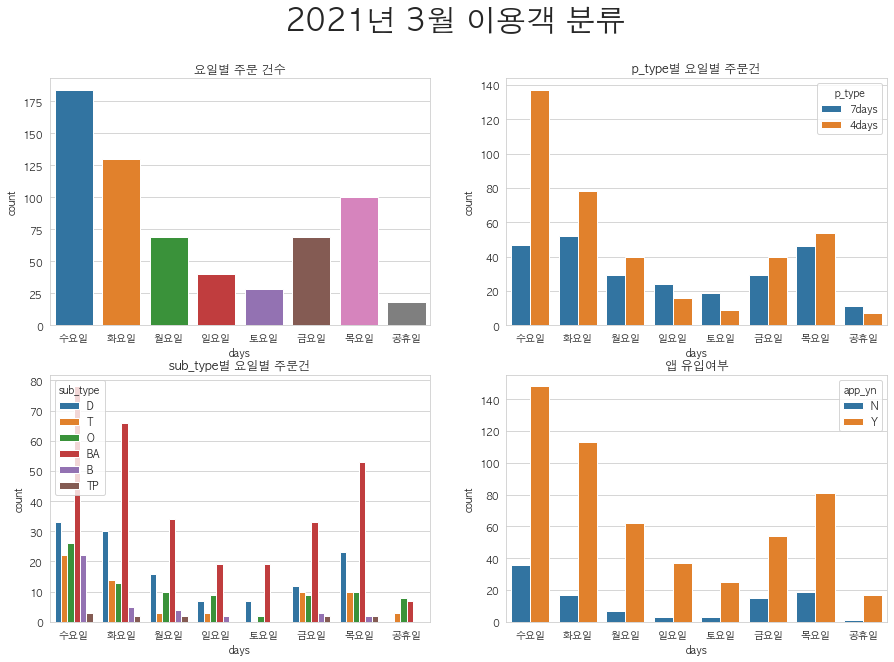

In [103]:
# 요일별 구매 분포
# 3월 공휴일(7)은 3.1절임, 삼일절은 월요일이었음 

f, ax  = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
sns.countplot(data=use_Mar, x='days')
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=use_Mar, x='days', hue='p_type')
plt.title('p_type별 요일별 주문건')

plt.subplot(223)
sns.countplot(data=use_Mar, x='days', hue='sub_type')
plt.title('sub_type별 요일별 주문건')

plt.subplot(224)
sns.countplot(data=use_Mar, x='days', hue='app_yn')
plt.title('앱 유입여부')

plt.suptitle('2021년 3월 이용객 분류',fontsize=30, fontweight = 'bold')
plt.show()

##  2-2. 주문 아이템 분석

### 2-2. Q1> 브랜드 별 선호도

In [104]:
# print(df.brandnm.unique())
# print('='*30)
print('클로젯쉐어 전체 브랜드 분류 수 :', len(df.brandnm.unique()))

클로젯쉐어 전체 브랜드 분류 수 : 245


In [105]:
df.groupby('brandnm').count()

,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
brandnm,,,,,,,,,,,
& Other Stories,8,8,8,8,8,8,8,8,8,8,8
A BY A,1,1,1,1,1,1,1,1,1,1,1
A.P.C.,3,3,3,3,3,3,3,3,3,3,3
ACNE STUDIOS,4,4,4,4,4,4,4,4,4,4,4
Adidas,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Zooc,2,2,2,2,2,2,2,2,2,2,2
cecilie bahnsen,1,1,1,1,1,1,1,1,1,1,1
khrisjoy,1,1,1,1,1,1,1,1,1,1,1


In [106]:
# 구매가 많은 상위 10개 브랜드
df.brandnm.value_counts().sort_values(ascending=False).head(10)

# 수요가 많은 건지, 공급이 많아서 많은 건지.. 
# 구찌가 압도적으로 많은데.. 

Gucci                 230
Chanel                 90
Saint Laurent          86
Louis Vuitton          79
Prada                  58
Burberry               53
Yves Saint Laurent     38
Thom Browne            33
Mixed                  29
Celine                 28
Name: brandnm, dtype: int64

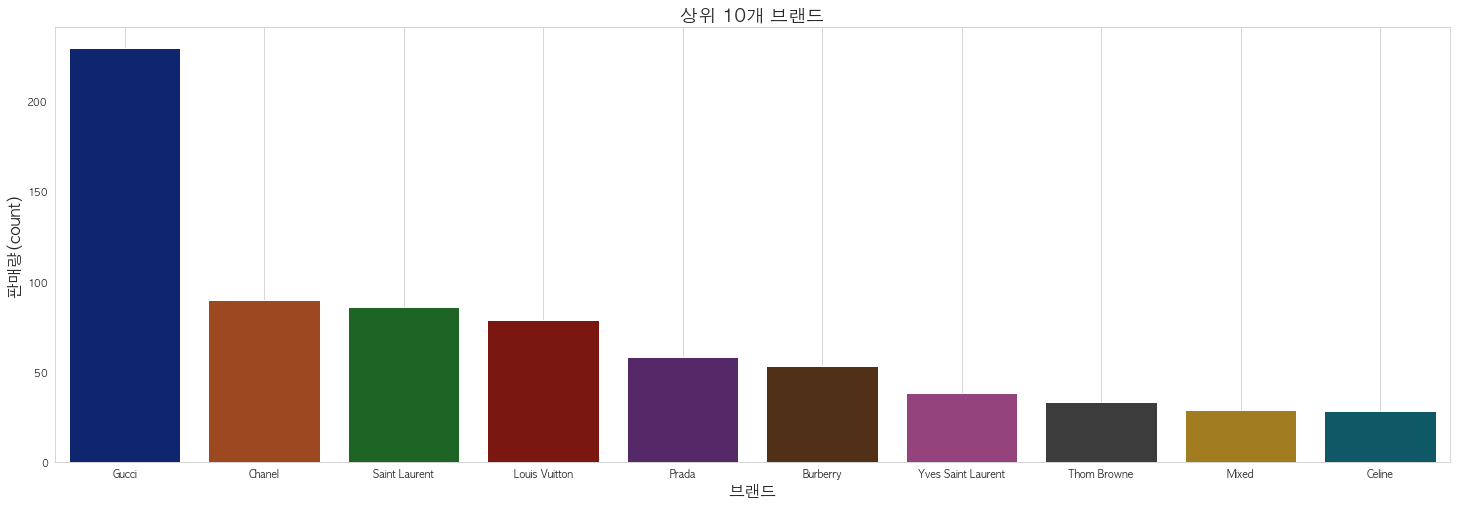

In [107]:
best_br = df.brandnm.value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(25,8))
sns.barplot(best_br.index, best_br.values, palette='dark')
plt.grid()
plt.title('상위 10개 브랜드', fontsize=18)
plt.ylabel('판매량(count)', fontsize=16)
plt.xlabel('브랜드', fontsize=16)
plt.show()

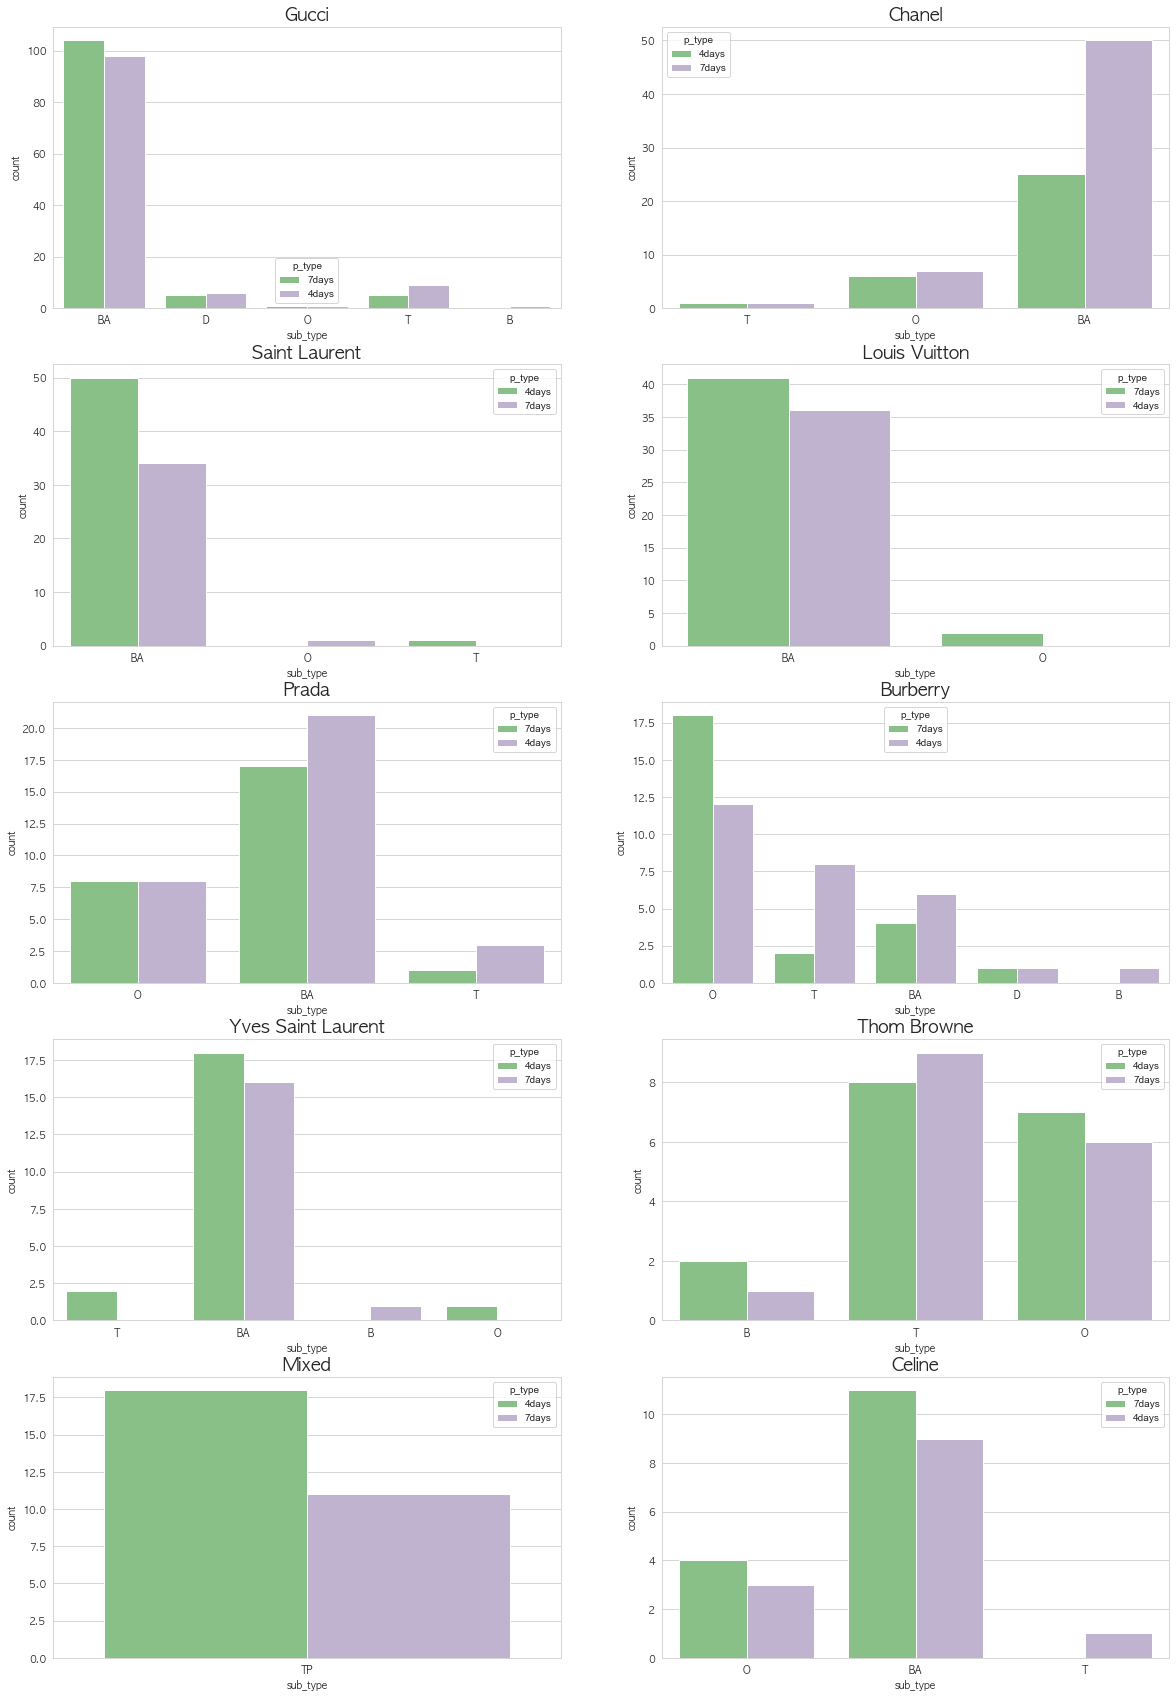

In [108]:
# 상위 10개 브랜드 sub_type 분포
# br = list(df.brandnm.value_counts().sort_values(ascending=False).head(30))
br = list(df.brandnm.value_counts().sort_values(ascending=False).head(10).index)

f, ax = plt.subplots(5,2 , figsize = (20,30))
axx = ax.flatten()


for axx2, j in zip(axx, br) :
    sns.set_style('whitegrid')
    plt.subplot(axx2)
    b_ca = df[df['brandnm'] == j]
    sns.countplot(data = b_ca, x= 'sub_type', hue='p_type', palette='Accent', ax= axx2)
    plt.title(j, fontsize = 18)

### - Top1 : Gucci 데이터만 따로 보기

In [109]:
# gucci 데이터만 따로 보기
gucci = df.query('brandnm == "Gucci"')[:]
gucci

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,금요일,주중,1,406
8,Gucci,dionysus cross bag,a1143028,2021-01-14,2021-01-15,4days,BA,Y,금요일,주중,1,1
16,Gucci,microssima mini cross body bag pink,a1142921,2021-01-14,2021-01-14,4days,BA,Y,목요일,주중,1,0
34,Gucci,padlock GG canvas shoulder bag,a143862,2019-09-29,2021-01-14,4days,BA,Y,목요일,주중,1,473
36,Gucci,flap cross bag black,a1141099,2021-01-04,2021-01-13,4days,BA,Y,수요일,주중,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,Gucci,super mini sylvie white,a1144433,2021-01-25,2021-03-02,7days,BA,Y,화요일,주중,3,36
1447,Gucci,vintage web GG two way bag brown,a1117218,2020-08-30,2021-03-02,7days,BA,Y,화요일,주중,3,184
1451,Gucci,sylvie mini chain ribbon bag red,a1147961,2021-03-01,2021-03-01,4days,BA,Y,공휴일,휴일,3,0
1452,Gucci,microssima emily mini bag black,a1147942,2021-03-01,2021-03-01,7days,BA,Y,공휴일,휴일,3,0


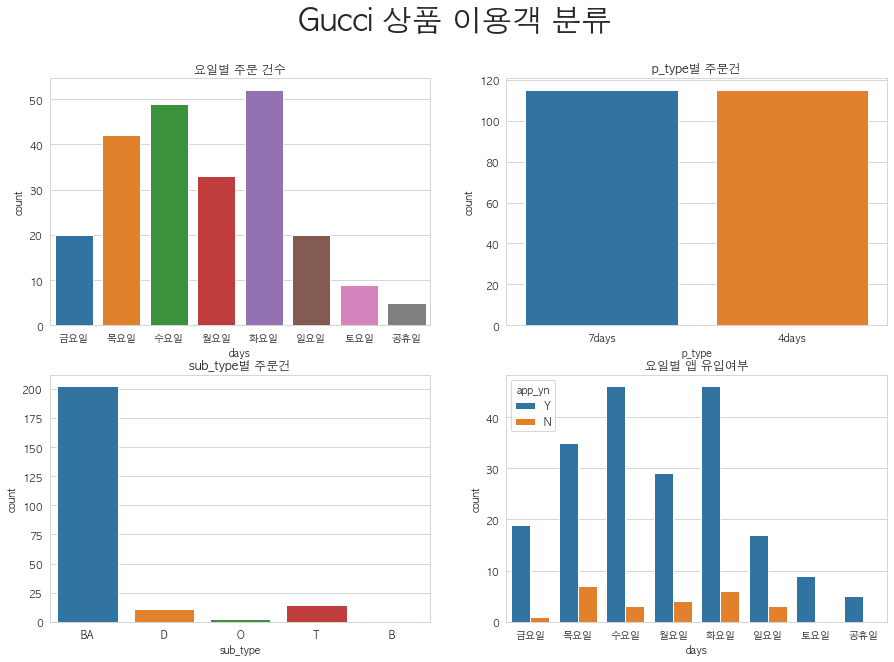

In [128]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
sns.countplot(data=gucci, x='days')
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=gucci, x='p_type')
plt.title('p_type별 주문건')

plt.subplot(223)
sns.countplot(data=gucci, x='sub_type')
plt.title('sub_type별 주문건')

plt.subplot(224)
sns.countplot(data=gucci, x='days', hue='app_yn')
plt.title('요일별 앱 유입여부')

plt.suptitle('Gucci 상품 이용객 분류',fontsize=30, fontweight = 'bold')
plt.show()

### - Top2 : Chanel 데이터만 따로 보기

In [129]:
Chanel = df.query('brandnm == "Chanel"')[:]
Chanel

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
28,Chanel,brooch stripe pattern turtle neck turtleneck navy,a1136028,2020-12-09,2021-01-14,4days,T,Y,목요일,주중,1,36
58,Chanel,pocket tweed pattern cashmere coat pink,a1138513,2020-12-20,2021-01-11,4days,O,Y,월요일,주중,1,22
98,Chanel,classic chain shoulder bag black,a1141379,2021-01-06,2021-01-06,7days,BA,Y,수요일,주중,1,0
103,Chanel,pocket basic pattern wool fullzip-jacket grey,a1141288,2021-01-05,2021-01-06,4days,O,Y,수요일,주중,1,1
135,Chanel,pocket graphics pattern zipup-jumper navy,a1112031,2020-08-15,2021-01-01,7days,O,N,공휴일,휴일,1,139
...,...,...,...,...,...,...,...,...,...,...,...,...
1450,Chanel,stripe pattern pointed cardigan multi,a1147961,2021-03-01,2021-03-01,4days,O,Y,공휴일,휴일,3,0
1453,Chanel,boy chanel clutch black,a1147960,2021-03-01,2021-03-01,7days,BA,Y,공휴일,휴일,3,0
1455,Chanel,brooch check pattern jacket cream,a1146108,2021-02-11,2021-03-01,7days,O,Y,공휴일,휴일,3,18
1456,Chanel,pocket tweed pattern cashmere coat pink,a1147959,2021-03-01,2021-03-01,7days,O,N,공휴일,휴일,3,0


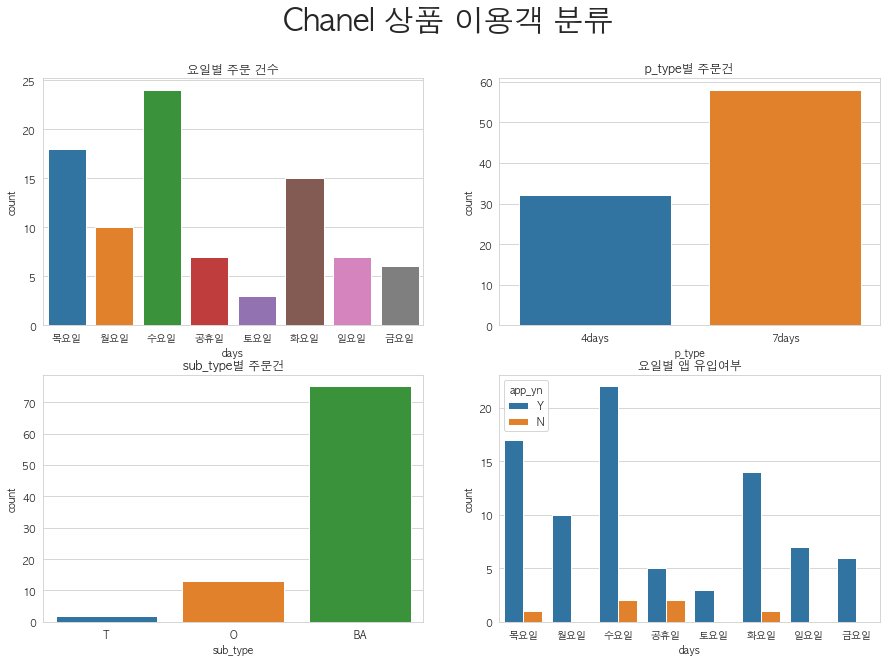

In [130]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
sns.countplot(data=Chanel, x='days')
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=Chanel, x='p_type')
plt.title('p_type별 주문건')

plt.subplot(223)
sns.countplot(data=Chanel, x='sub_type')
plt.title('sub_type별 주문건')

plt.subplot(224)
sns.countplot(data=Chanel, x='days', hue='app_yn')
plt.title('요일별 앱 유입여부')

plt.suptitle('Chanel 상품 이용객 분류',fontsize=30, fontweight = 'bold')
plt.show()

### - Top3 : Saint Laurent 데이터만 따로 보기

In [131]:
S_Laurent = df.query('brandnm == "Saint Laurent"')[:]
S_Laurent

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
45,Saint Laurent,chevron quilted cross bag black,a1140871,2021-01-02,2021-01-13,4days,BA,Y,수요일,주중,1,11
51,Saint Laurent,chevron quilted cross bag black,a1141925,2021-01-09,2021-01-12,4days,BA,Y,화요일,주중,1,3
56,Saint Laurent,mini sunset chain bag black,a1142471,2021-01-12,2021-01-12,7days,BA,Y,화요일,주중,1,0
67,Saint Laurent,button basic pattern blazer black,a1140758,2021-01-01,2021-01-10,7days,O,Y,일요일,휴일,1,9
115,Saint Laurent,quilted calfskin shoulder bag,a1139320,2020-12-22,2021-01-05,7days,BA,Y,화요일,주중,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...
1311,Saint Laurent,chevron quilted cross bag black,a1135400,2020-12-05,2021-03-09,4days,BA,Y,화요일,주중,3,94
1320,Saint Laurent,monogram mini universal bag black,a1148747,2021-03-09,2021-03-09,7days,BA,Y,화요일,주중,3,0
1357,Saint Laurent,chevron quilted cross bag black,a1148129,2021-03-03,2021-03-06,7days,BA,N,토요일,휴일,3,3
1377,Saint Laurent,quilted calfskin shoulder bag,a1148237,2021-03-04,2021-03-04,4days,BA,N,목요일,주중,3,0


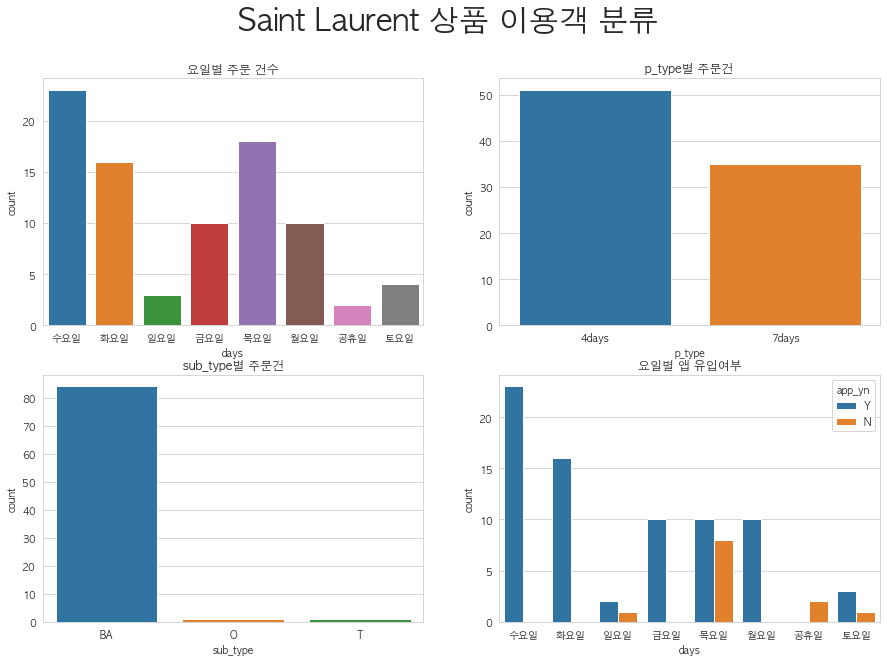

In [132]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
sns.countplot(data=S_Laurent, x='days')
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=S_Laurent, x='p_type')
plt.title('p_type별 주문건')

plt.subplot(223)
sns.countplot(data=S_Laurent, x='sub_type')
plt.title('sub_type별 주문건')

plt.subplot(224)
sns.countplot(data=S_Laurent, x='days', hue='app_yn')
plt.title('요일별 앱 유입여부')

plt.suptitle('Saint Laurent 상품 이용객 분류',fontsize=30, fontweight = 'bold')
plt.show()

### - Top4 : Louis Vuitton 데이터만 따로 보기

In [133]:
Louis_Vuitton = df.query('brandnm == "Louis Vuitton"')[:]
Louis_Vuitton

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
10,Louis Vuitton,twist monogram patent shoulder bag black,a1140216,2020-12-28,2021-01-15,7days,BA,Y,금요일,주중,1,18
44,Louis Vuitton,monogram shoulder bag black,a164734,2019-12-13,2021-01-13,4days,BA,Y,수요일,주중,1,397
73,Louis Vuitton,alma epi pm tote bag black,a1141816,2021-01-09,2021-01-09,7days,BA,Y,토요일,휴일,1,0
91,Louis Vuitton,monogram clutch brown,a1141530,2021-01-07,2021-01-07,7days,BA,Y,목요일,주중,1,0
144,Louis Vuitton,logo chain tote bag black,a1144704,2021-01-27,2021-01-30,4days,BA,Y,토요일,휴일,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1325,Louis Vuitton,verni mini clutch chain bag brown,a1138484,2020-12-20,2021-03-09,7days,BA,Y,화요일,주중,3,79
1332,Louis Vuitton,monogram clutch brown,a1148708,2021-03-09,2021-03-09,4days,BA,Y,화요일,주중,3,0
1384,Louis Vuitton,galliera gm Shoulder hobo Bag white,a1148221,2021-03-04,2021-03-04,7days,BA,Y,목요일,주중,3,0
1417,Louis Vuitton,Pochette trunk vertical black bag,a1148115,2021-03-03,2021-03-03,4days,BA,Y,수요일,주중,3,0


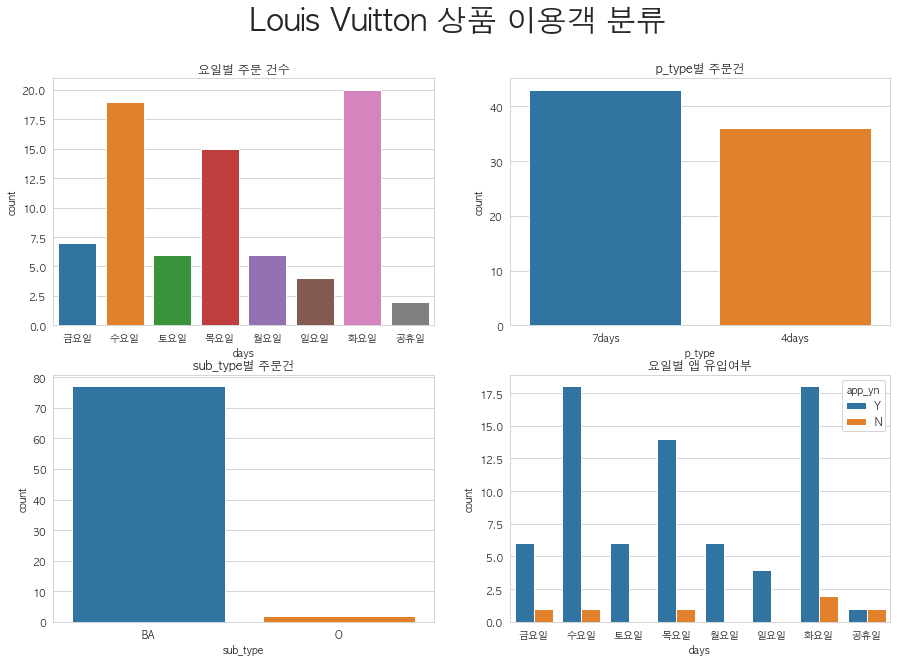

In [134]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
sns.countplot(data=Louis_Vuitton, x='days')
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=Louis_Vuitton, x='p_type')
plt.title('p_type별 주문건')

plt.subplot(223)
sns.countplot(data=Louis_Vuitton, x='sub_type')
plt.title('sub_type별 주문건')

plt.subplot(224)
sns.countplot(data=Louis_Vuitton, x='days', hue='app_yn')
plt.title('요일별 앱 유입여부')

plt.suptitle('Louis Vuitton 상품 이용객 분류',fontsize=30, fontweight = 'bold')
plt.show()

### - Top5 : Prada 데이터만 따로 보기

In [135]:
Prada = df.query('brandnm == "Prada"')[:]
Prada

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
5,Prada,ruffle detail long coat,a110231,2018-10-18,2021-01-15,7days,O,Y,금요일,주중,1,820
12,Prada,color fur detail coat black,a1137815,2020-12-18,2021-01-15,7days,O,Y,금요일,주중,1,28
13,Prada,zipper detail cape padding jumper,a1135135,2020-12-04,2021-01-15,7days,O,Y,금요일,주중,1,42
15,Prada,logo hobo bag black,a1143143,2021-01-15,2021-01-15,4days,BA,Y,금요일,주중,1,0
30,Prada,quilted cross body bag black,a1142924,2021-01-14,2021-01-14,4days,BA,Y,목요일,주중,1,0
37,Prada,single button modern coat black,a1142328,2021-01-11,2021-01-13,4days,O,Y,수요일,주중,1,2
48,Prada,collar point long coat multi,a189599,2020-03-22,2021-01-13,7days,O,Y,수요일,주중,1,297
53,Prada,button check pattern wool singlebreasted-jacke...,a1120719,2020-09-21,2021-01-12,4days,O,Y,화요일,주중,1,113
123,Prada,padding two way bag black,a1141018,2021-01-04,2021-01-04,4days,BA,Y,월요일,주중,1,0
171,Prada,logo hobo bag black,a1135097,2020-12-04,2021-01-28,4days,BA,Y,목요일,주중,1,55


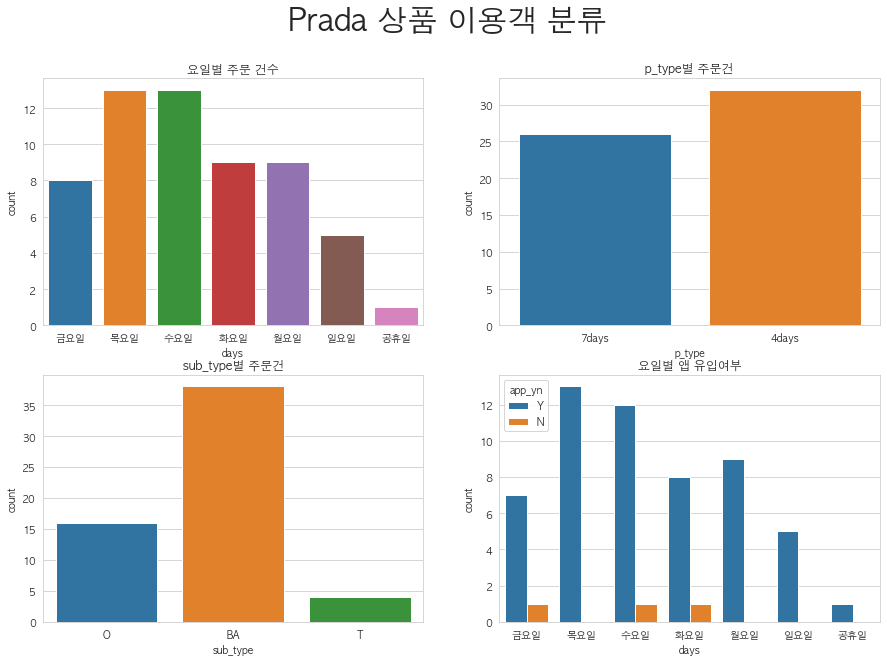

In [136]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
sns.countplot(data=Prada, x='days')
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=Prada, x='p_type')
plt.title('p_type별 주문건')

plt.subplot(223)
sns.countplot(data=Prada, x='sub_type')
plt.title('sub_type별 주문건')

plt.subplot(224)
sns.countplot(data=Prada, x='days', hue='app_yn')
plt.title('요일별 앱 유입여부')

plt.suptitle('Prada 상품 이용객 분류',fontsize=30, fontweight = 'bold')
plt.show()

### 2-2. Q2> 아이템 카테고리별 선호도 분석

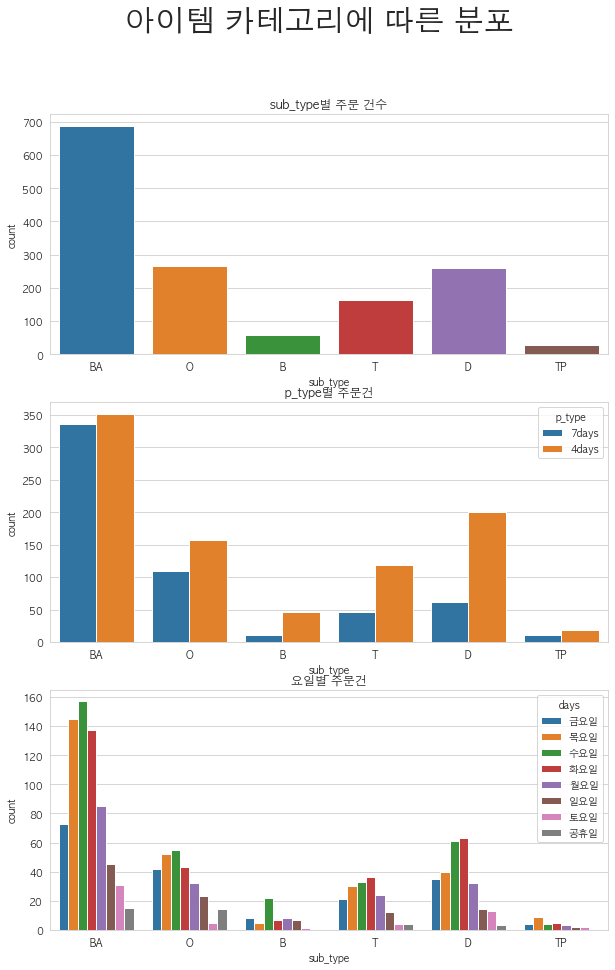

In [137]:
f, ax  = plt.subplots(3,1,figsize=(10,15))
plt.subplot(311)
sns.countplot(data=df, x='sub_type')
plt.title('sub_type별 주문 건수')

plt.subplot(312)
sns.countplot(data=df, x='sub_type', hue='p_type')
plt.title('p_type별 주문건')

plt.subplot(313)
sns.countplot(data=df, x='sub_type', hue='days')
plt.title('요일별 주문건')

# plt.subplot(224)
# sns.countplot(data=df, x='sub_type', hue='app_yn')
# plt.title('앱 유입여부')

plt.suptitle('아이템 카테고리에 따른 분포',fontsize=30, fontweight = 'bold')
plt.show()

### 2-2. Q3> 신규 유저들의 구매 트렌드 파악

In [138]:
# 신규유저를 어느일을 기준으로 정할 것인지 고민이 필요
# 일단은 올해부터 가입한 사람부터 신규 유저라고 정하겠음.

new_usr = df[df.reg_date > '2020-12-31']
new_usr

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N,금요일,주중,1,13
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N,금요일,주중,1,13
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N,금요일,주중,1,13
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,금요일,주중,1,14
8,Gucci,dionysus cross bag,a1143028,2021-01-14,2021-01-15,4days,BA,Y,금요일,주중,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Burberry London,embroidery basic pattern wool sweater brown,a1147932,2021-03-01,2021-03-01,4days,T,Y,공휴일,휴일,3,0
1460,London Fog,button basic pattern coat grey,a1147932,2021-03-01,2021-03-01,4days,O,Y,공휴일,휴일,3,0
1462,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y,공휴일,휴일,3,18
1463,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y,공휴일,휴일,3,1


In [139]:
# 2021년 가입자 선호 브랜드
new_usr.brandnm.value_counts().sort_values(ascending=False).head(10)

Gucci                 166
Saint Laurent          66
Chanel                 65
Louis Vuitton          61
Prada                  36
Burberry               33
Yves Saint Laurent     24
Celine                 22
Fendi                  19
Thom Browne            19
Name: brandnm, dtype: int64

In [140]:
old_usr = df[df.reg_date <= '2020-12-31']
old_usr

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,금요일,주중,1,406
5,Prada,ruffle detail long coat,a110231,2018-10-18,2021-01-15,7days,O,Y,금요일,주중,1,820
6,Max Mara,strap basic pattern wrap-coat black,a1139960,2020-12-26,2021-01-15,7days,O,Y,금요일,주중,1,20
7,Molliolli,pocket basic pattern fur-outer ivory,a115159,2019-01-29,2021-01-15,4days,O,Y,금요일,주중,1,717
9,Sandro,pattern pointed cardigan black,a117306,2019-03-02,2021-01-15,7days,O,Y,금요일,주중,1,685
...,...,...,...,...,...,...,...,...,...,...,...,...
1449,Burberry,button basic pattern wool cardigan grey,a163815,2019-12-12,2021-03-01,7days,O,Y,공휴일,휴일,3,445
1454,Gucci,marmont gg logo quilted bag Black 2,a177034,2020-01-23,2021-03-01,4days,BA,Y,공휴일,휴일,3,403
1457,Max Mara,zipper detail two tone jacket,a112319,2018-11-29,2021-03-01,4days,O,Y,공휴일,휴일,3,823
1461,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y,공휴일,휴일,3,691


In [141]:
# 2021년 이전 가입자 선호 브랜드
old_usr.brandnm.value_counts().sort_values(ascending=False).head(10)

Gucci                 64
Chanel                25
Prada                 22
Burberry              20
Saint Laurent         20
Louis Vuitton         18
Thom Browne           14
Yves Saint Laurent    14
Mixed                 12
Max Mara              12
Name: brandnm, dtype: int64

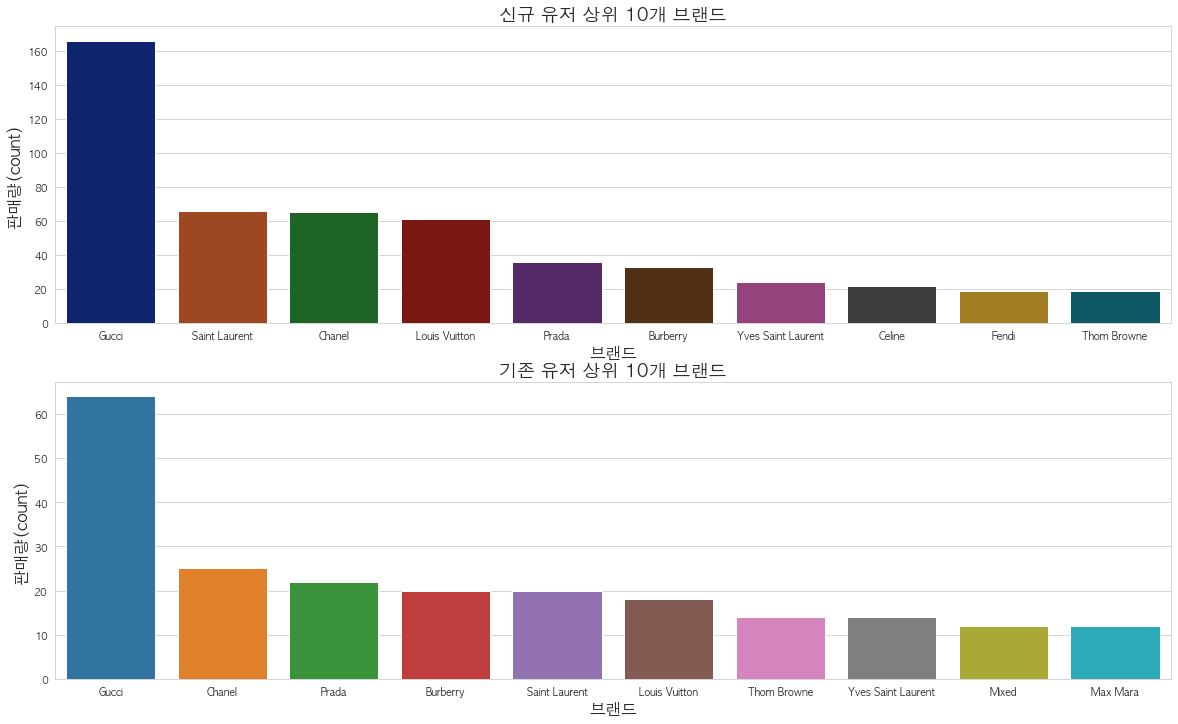

In [142]:
new_br = new_usr.brandnm.value_counts().sort_values(ascending=False).head(10)
old_br = old_usr.brandnm.value_counts().sort_values(ascending=False).head(10)

plt.subplots(2,1,figsize=(20,12))
plt.subplot(211)
sns.barplot(new_br.index, new_br.values, palette='dark')
plt.title('신규 유저 상위 10개 브랜드', fontsize=18)
plt.ylabel('판매량(count)', fontsize=16)
plt.xlabel('브랜드', fontsize=16)

plt.subplot(212)
sns.barplot(old_br.index, old_br.values)
plt.title('기존 유저 상위 10개 브랜드', fontsize=18)
plt.ylabel('판매량(count)', fontsize=16)
plt.xlabel('브랜드', fontsize=16)
plt.show()

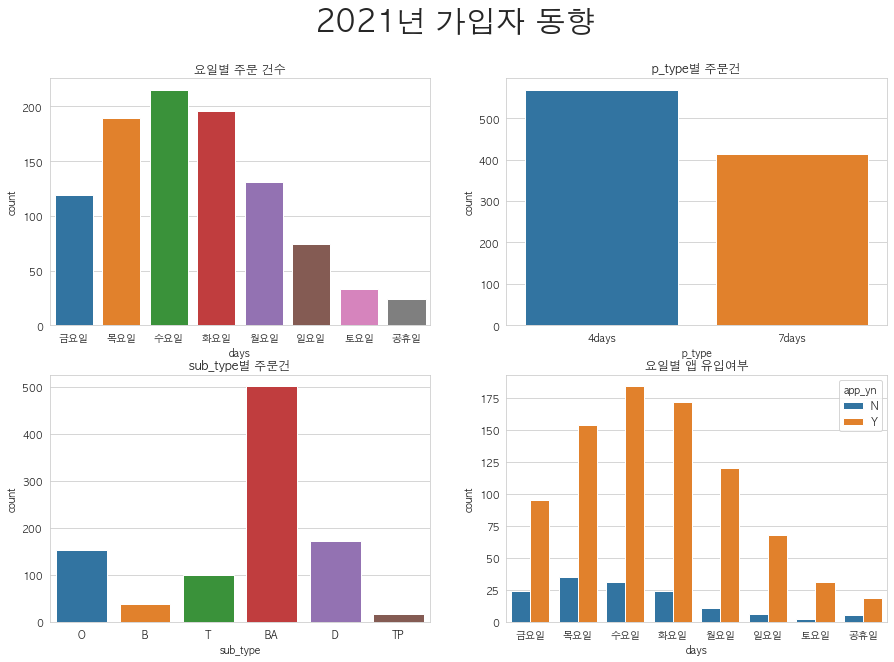

In [143]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
sns.countplot(data=new_usr, x='days')
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=new_usr, x='p_type')
plt.title('p_type별 주문건')

plt.subplot(223)
sns.countplot(data=new_usr, x='sub_type')
plt.title('sub_type별 주문건')

plt.subplot(224)
sns.countplot(data=new_usr, x='days', hue='app_yn')
plt.title('요일별 앱 유입여부')

plt.suptitle('2021년 가입자 동향',fontsize=30, fontweight = 'bold')
plt.show()

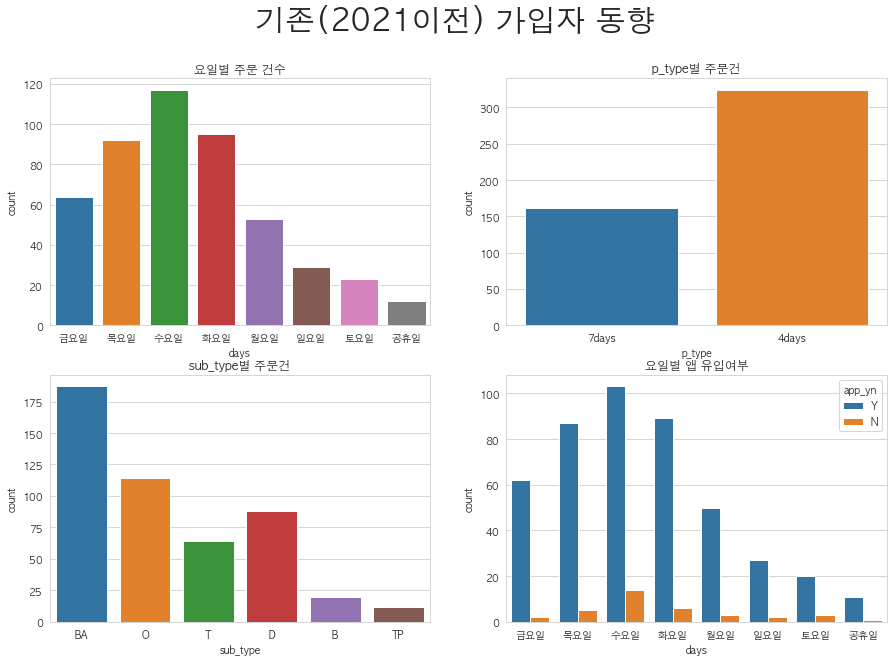

In [144]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
sns.countplot(data=old_usr, x='days')
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=old_usr, x='p_type')
plt.title('p_type별 주문건')

plt.subplot(223)
sns.countplot(data=old_usr, x='sub_type')
plt.title('sub_type별 주문건')

plt.subplot(224)
sns.countplot(data=old_usr, x='days', hue='app_yn')
plt.title('요일별 앱 유입여부')

plt.suptitle('기존(2021이전) 가입자 동향',fontsize=30, fontweight = 'bold')
plt.show()

In [180]:
# 개별 아이템별 선호도 상품 분석 

aa = list(df.goodsnm.value_counts().head(11).index)
cnt = list(df.goodsnm.value_counts().head(11).values)

In [181]:
for i in range(len(aa)):
    bb = df[df.goodsnm == aa[i]]['brandnm'].unique()
    print(bb, ':', aa[i], '주문수량', cnt[i])

['Saint Laurent'] : chevron quilted cross bag black 주문수량 23
['Chanel'] : classic clutch black 주문수량 12
['Chanel'] : boy chanel clutch black 주문수량 11
['Gucci'] : padlock GG canvas shoulder bag 주문수량 9
['Saint Laurent'] : mini sunset chain bag black 주문수량 8
['Louis Vuitton'] : epi tote bag black 주문수량 8
['Gucci'] : dionysus shoulder bag beige 주문수량 8
['Gucci'] : flap cross bag black 주문수량 7
['Saint Laurent' 'Chanel'] : quilted shoulder bag black 주문수량 7
['Gucci'] : dionysus cross bag beige 주문수량 7
['Louis Vuitton'] : monogram clutch brown 주문수량 7


In [182]:
df.goodsnm.value_counts().head(11)

chevron quilted cross bag black    23
classic clutch black               12
boy chanel clutch black            11
padlock GG canvas shoulder bag      9
mini sunset chain bag black         8
epi tote bag black                  8
dionysus shoulder bag beige         8
flap cross bag black                7
quilted shoulder bag black          7
dionysus cross bag beige            7
monogram clutch brown               7
Name: goodsnm, dtype: int64

In [178]:
# gucci 만 따로 보기 
aa = list(gucci.goodsnm.value_counts().head(14).index)
cnt = list(gucci.goodsnm.value_counts().head(14).values)

In [179]:
for i in range(len(aa)):
    bb = gucci[gucci.goodsnm == aa[i]]['brandnm'].unique()
    print(bb, ':', aa[i], ', 주문수량 : ', cnt[i])

['Gucci'] : padlock GG canvas shoulder bag , 주문수량 :  9
['Gucci'] : dionysus shoulder bag beige , 주문수량 :  8
['Gucci'] : dionysus cross bag beige , 주문수량 :  7
['Gucci'] : flap cross bag black , 주문수량 :  7
['Gucci'] : microssima emily mini bag black , 주문수량 :  6
['Gucci'] : mammont chain wallet bag black , 주문수량 :  6
['Gucci'] : sylvie leather mini chain bag black , 주문수량 :  5
['Gucci'] : marmont GG logo quilted bag black , 주문수량 :  5
['Gucci'] : mamont chain bag black , 주문수량 :  5
['Gucci'] : logo pointed cross bag , 주문수량 :  5
['Gucci'] : mamont chain mini cross bag black , 주문수량 :  5
['Gucci'] : dionysos velvet chain shoulder bag navy , 주문수량 :  5
['Gucci'] : vintage web shoulder bag black , 주문수량 :  5
['Gucci'] : logo pointed cross bag black , 주문수량 :  5
